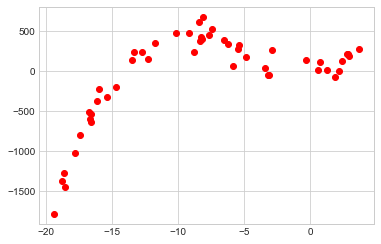

In [1051]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 7 * x + 15 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

In [1052]:
x=[row[0] for row in x]
y=[row[0] for row in y]
def polyfunc(M):
    curve=np.polyfit(x,y,M)
    poly=np.poly1d(curve)
    new_y=[]
    for i in x:
        y_update=poly(i)
        new_y.append(y_update)
    return new_y

In [1053]:
def plotting_func(M):
    ax=plt.subplot()
    ax.plot(x,y,'ro',label='Data')
    ax.plot(x,polyfunc(M),'o',label='Polygon')
    plt.title('M =' + str(M))
    plt.xlabel('x Values')
    plt.ylabel('y Values')
    plt.legend()
    plt.show()

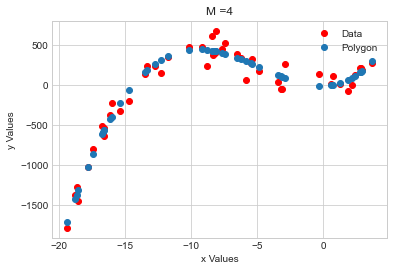

In [1054]:
plotting_func(4)

In [1055]:
num_of_genes = 4

In [1056]:
#Randomly Generation 100 Chromosome
def generate_population(n):
    chromosom_list=[]
    for i in range(n):
        chromosome = np.random.randint(low=0, high=25, size=num_of_genes)
        chromosom_list.append(chromosome)
    return chromosom_list
chromosom_list=generate_population(100)

In [1057]:
# Badness Score
def badness_score(chromosom_list):
    mse=[]
    for gene in chromosom_list:
        poly = np.poly1d(gene)
        n=len(x)
        y_prediction=[]
        for a in x:
            y=poly(a)
            y_prediction.append(y)
        mse_calculation=((y-y_prediction)**2)/n
        mse.append(mse_calculation)
        
    MSE_list=[]
    for i in mse:
        b=sum(i)
        MSE_list.append(b)
    return MSE_list       

error_values=badness_score(chromosom_list)

In [1058]:
def best_chromosomes_list(chromosom_list,error_values,n_best):
    shorted_errors=np.sort(error_values)
    smallest_n_errors=shorted_errors[:n_best]
    
    best_chromosome_index_numbers=[]
    for i in smallest_n_errors:
        index_value=error_values.index(i)
        best_chromosome_index_numbers.append(index_value)

    best_chromosomes=[]
    for i in best_chromosome_index_numbers:
        best_chromosomes.append(chromosom_list[i])

    return best_chromosomes
best_chromosomes=best_chromosomes_list(chromosom_list,error_values,10)

In [1059]:
# Randomly Picked Singel Point Crossover Operation
def crossover(best_chromosomes,crossoverRate=1):
    cross_over_genes=[]
    for l in range(0,len(best_chromosomes),2):
        if (np.random.uniform(0.0, 1.0) <= crossoverRate):
            a=best_chromosomes[l]
            b=best_chromosomes[l+1]
            random_element =np.random.randint(low = 0, high= 4)
            a1=a[:random_element]
            a2=a[random_element:]
            b1=b[random_element:]
            b2=b[:random_element]
            offspring1=[]
            offspring2=[]
            for i in range(len(a1)):
                offspring1.append(a1[i])
                offspring2.append(b2[i])
            for k in range(len(b1)):
                offspring1.append(b1[k])
                offspring2.append(a2[k])
            cross_over_genes.append(offspring1)
            cross_over_genes.append(offspring2)
    return cross_over_genes
crossover_list=np.array(crossover(best_chromosomes))

In [1060]:
def mutation(best_chromosomes,mutationRate):
    mutated_chromosomes=[]
    for gene in best_chromosomes:
        if (np.random.uniform(0.0, 1.0) <= mutationRate):
            new_gene=gene
            #Picking a random element in the gene
            random_element =np.random.randint(low = 0, high= 4)     
            #Mutation operation--Multiplying Random Element with Random Floating Number
            mutated_gene = new_gene[random_element] *  np.random.uniform(0.0, 2.0)
            new_gene[random_element]=mutated_gene     
            mutated_chromosomes.append(new_gene)
    return mutated_chromosomes      

In [1061]:
def generation_new_genes(iter=500, mutationRate=0.1, crossoverRate=1):
    chromosomes = generate_population(100)
    for i in range(iter):
        # Compute Error of Chromosomes
        error = badness_score(chromosomes)

        # Keep 10 Best Chromosomes
        keptChromos = []
        n_best=10
        best_chromosomes=best_chromosomes_list(chromosomes,error,n_best)
        
        #Generation
        for i in best_chromosomes:
            keptChromos.append(i)

        # Generate New Chromosomes
        chromosomes = []
        for chrIdx in range(0,len(keptChromos),2):
            chr1 = keptChromos[chrIdx]
            chr2 = keptChromos[chrIdx+1]
            chromosomes.append(chr1)
            chromosomes.append(chr2)
            while len(chromosomes) < (20*((chrIdx/2)+1)):
            #Crossover
                if (np.random.uniform(0.0, 1.0) <= crossoverRate):
                    randIdx = np.random.randint(0,3)
                    newChromo = []
                    for i1 in range(randIdx+1):
                        newChromo.append(chr1[i1])
                    for i2 in range(randIdx+1, len(chr2)):
                        newChromo.append(chr2[i2])
                    chromosomes.append(np.array(newChromo))

            # Mutation
                if (np.random.uniform(0.0, 1.0) <= mutationRate):
                    randIdx = np.random.randint(0,4)
                    randMlt = np.random.uniform(0.0, 2.0)
                    if np.random.randint(0,10) < 5: tmp = chr1.copy()
                    else: tmp = chr2.copy()
                    tmp[randIdx] = tmp[randIdx] * randMlt
                    chromosomes.append(tmp)

      # Pick Best Chromosome
        MSE_new=badness_score(chromosomes)
        best_new_gene=best_chromosomes_list(chromosomes,MSE_new,1)
        return chromosomes

In [1062]:
GA=generation_new_genes(iter=500, mutationRate=0.10, crossoverRate=1.00)

In [1063]:
error=badness_score(GA[0])
best=best_chromosomes_list(GA,error,1)
best[0]

array([ 1, 20, 20, 21])

In [1064]:
def generation(iteration,n_population,mutationRate=0.1, crossoverRate=1):
    population=generate_population(n_population)
    
    
    for i in range(iteration):
        MSE=badness_score(population)
        
        #Picking n_best chromosomes
        n_best=10
        best_chromosomes=(best_chromosomes_list(population,MSE,n_best))
        population=[]
        #Generation
        for i in best_chromosomes:
            population.append(i)
        
        cross_over=crossover(best_chromosomes,crossoverRate=1)
        for i in cross_over:
            population.append(i)
        
        mutated_offsprings=mutation(cross_over,mutationRate)
        for i in mutated_offsprings:
            population.append(i)
        
#     MSE_new=badness_score(new_chromosomes)
#     best_new_gene=best_chromosomes_list(new_chromosomes,MSE_new,1)
        return population


In [1065]:
ga2=generation(500,100,mutationRate=0.1,crossoverRate=1)

In [1066]:
error2=badness_score(ga2[0])
best2=best_chromosomes_list(ga2,error2,1)
best2[0]

array([ 1, 22, 15, 18])

In [1067]:
poly2 = np.poly1d(best2[0])
prediction2=[]
for a in x:
    y_new=poly2(a)
    prediction2.append(y_new) 

In [1068]:
poly = np.poly1d(best[0])
prediction=[]
for a in x:
    y_new=poly(a)
    prediction.append(y_new) 

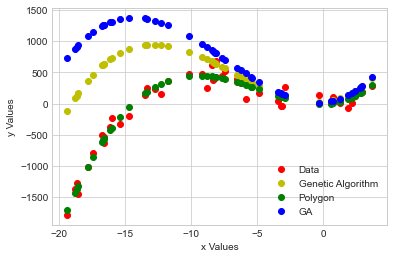

In [1069]:
ax=plt.subplot()
ax.plot(x,y,'ro',label='Data')
ax.plot(x,prediction,'o',label='Genetic Algorithm',color='y')
ax.plot(x,polyfunc(4),'o',label='Polygon',color='g')
ax.plot(x,prediction2,'o',label='GA',color='b')
plt.xlabel('x Values')
plt.ylabel('y Values')
plt.legend()
plt.show()